# 威斯康辛州乳腺癌sklearn数据集训练

该项目基于sklearn库中的威斯康辛州乳腺癌数据集，使用高斯朴素贝叶斯进行训练。

## 1. 数据集分析

In [362]:
#导入所需库
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib
#从sklearn中加载数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()  # 加载乳腺癌数据集

#可视化和模型评估相关的导入
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [363]:
#导入cancer数据集
cancer = load_breast_cancer() 

#使用pd对特征进行观察
feature = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#显示数据集的特征
print("数据集中特征的参数：{}".format(feature.shape))
feature

数据集中特征的参数：(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**该数据集中存在569组数据，数据分为30个特征。**

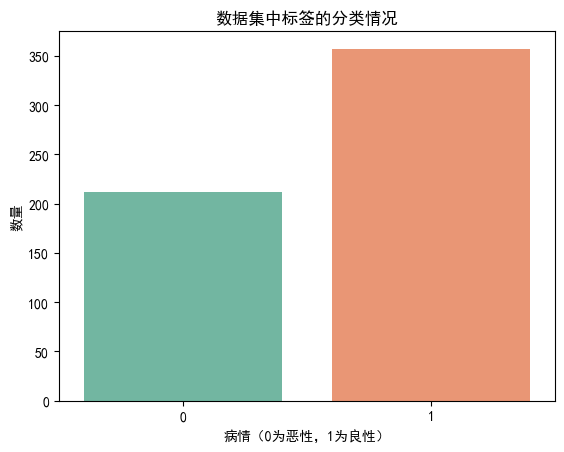

In [364]:
#观察数据集中的标签分类和数量。

#指明字体参数，实现中文标签
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

sns.countplot(x = cancer['target'], palette="Set2")#0 恶性 1 良性
plt.ylabel("数量")
plt.xlabel("病情（0为恶性，1为良性）")
plt.title("数据集中标签的分类情况")

plt.show()

**用直方图观察数据集中每个特征的分布情况。**

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


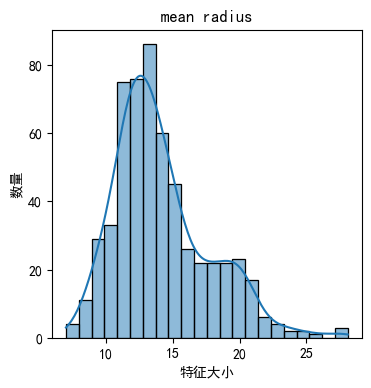

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


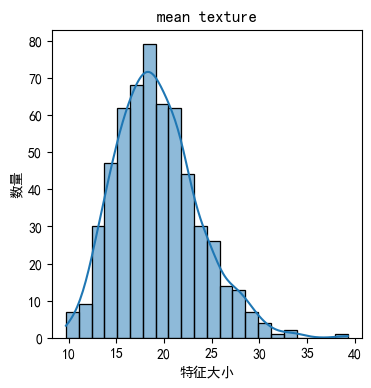

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


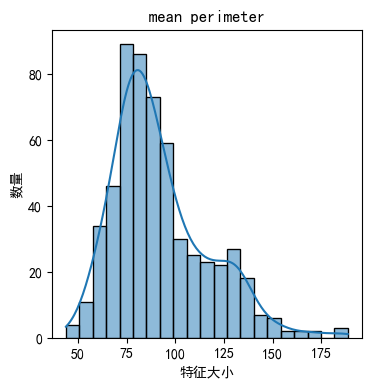

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


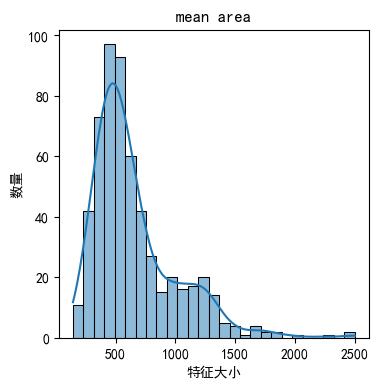

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


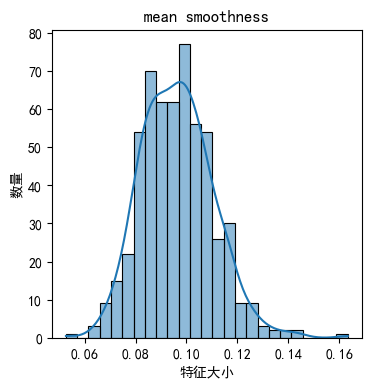

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


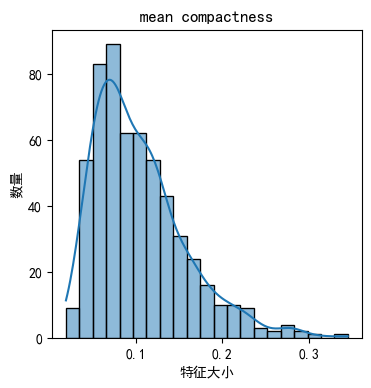

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


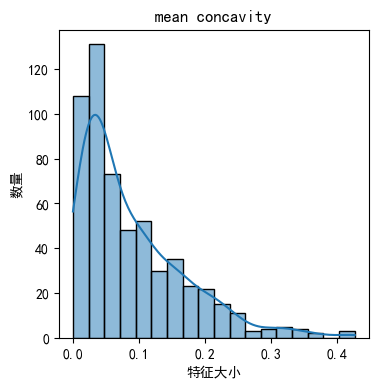

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


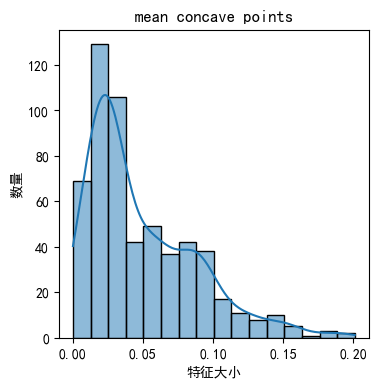

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


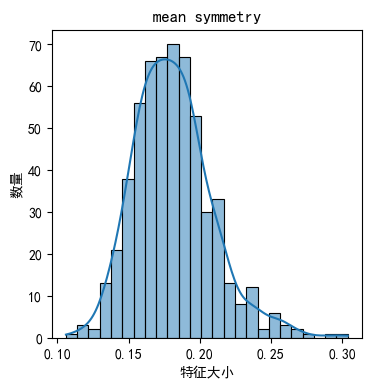

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


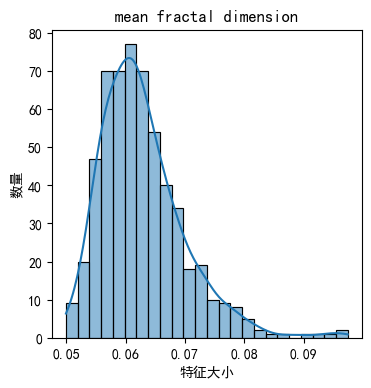

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


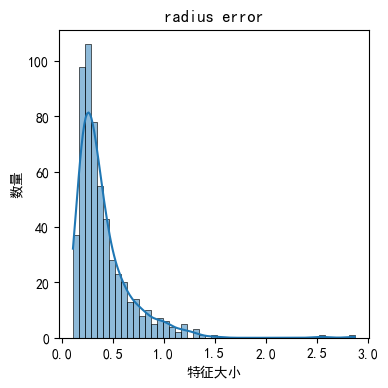

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


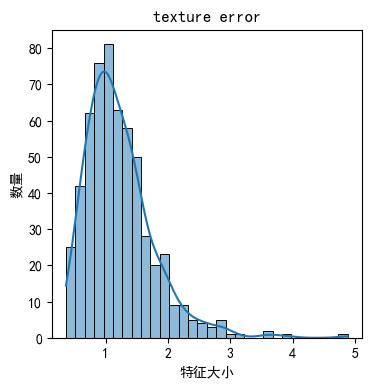

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


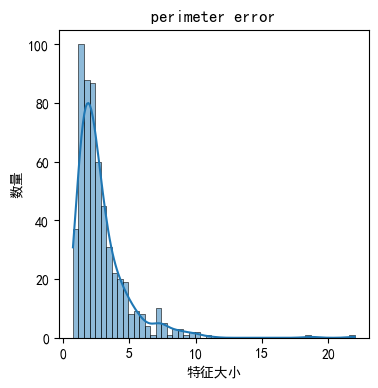

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


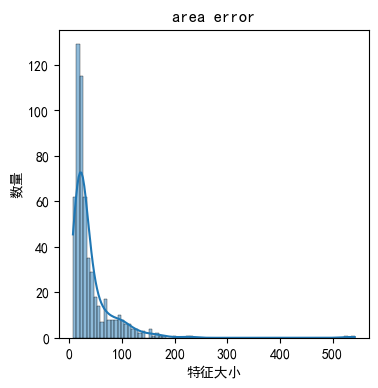

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


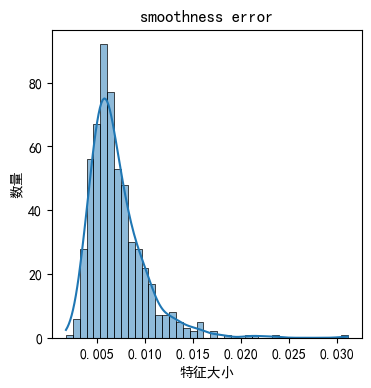

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


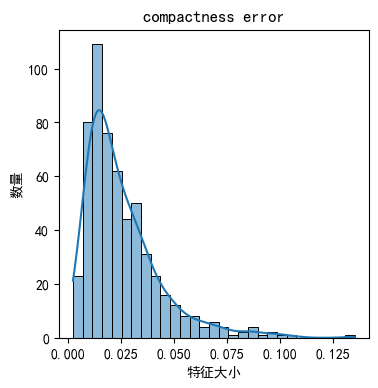

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


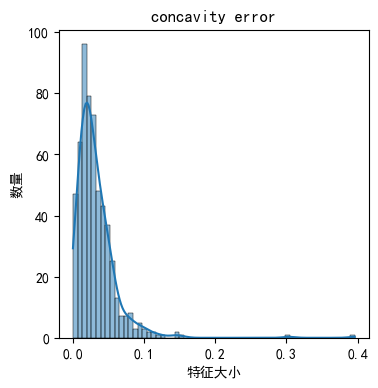

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


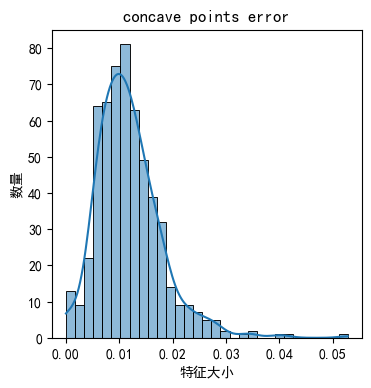

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


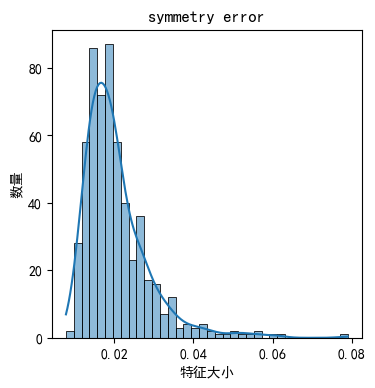

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


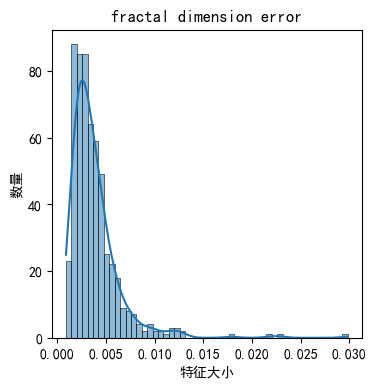

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


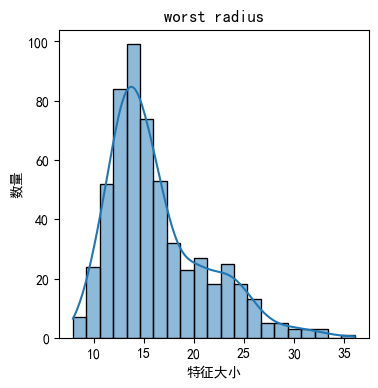

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


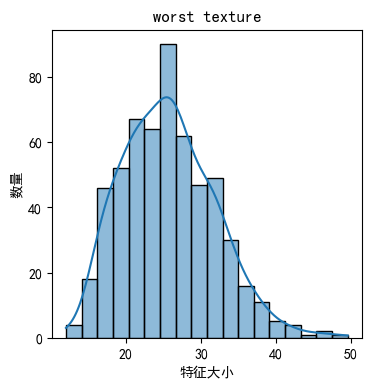

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


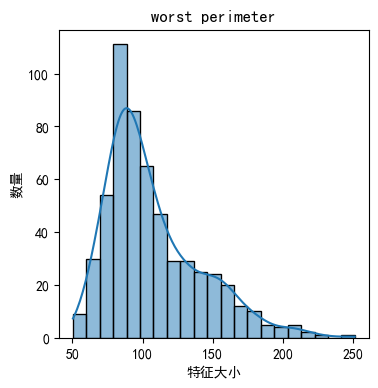

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


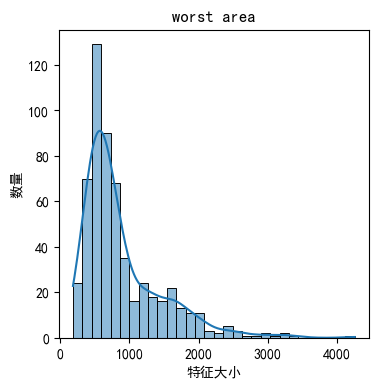

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


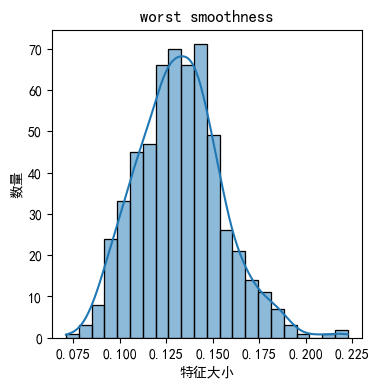

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


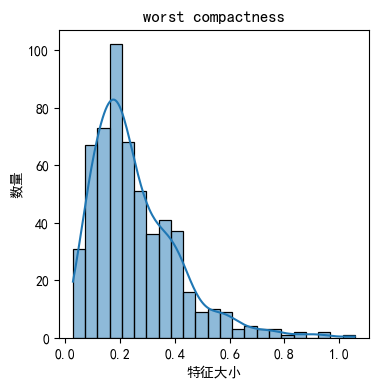

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


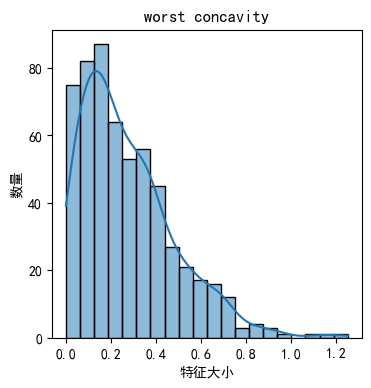

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


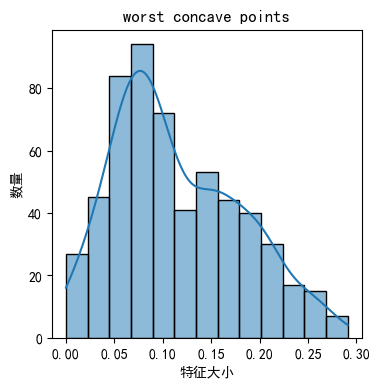

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


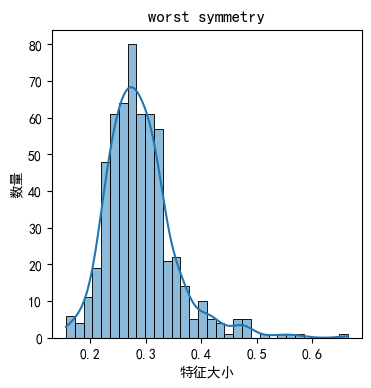

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


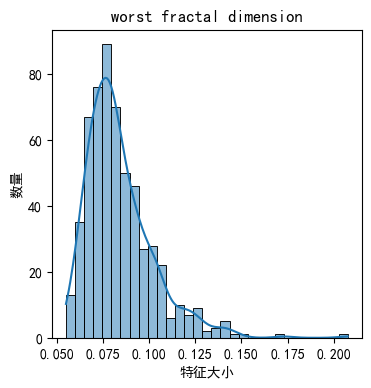

In [365]:
#绘制每个数值属性的直方图
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

for i, feature_name in enumerate(feature.columns.values):
    
    plt.figure(figsize=(4, 4))
    sns.histplot(feature.iloc[:, i], kde=True)

    plt.xlabel("特征大小")
    plt.ylabel("数量")
    plt.title(feature_name)
    plt.show()


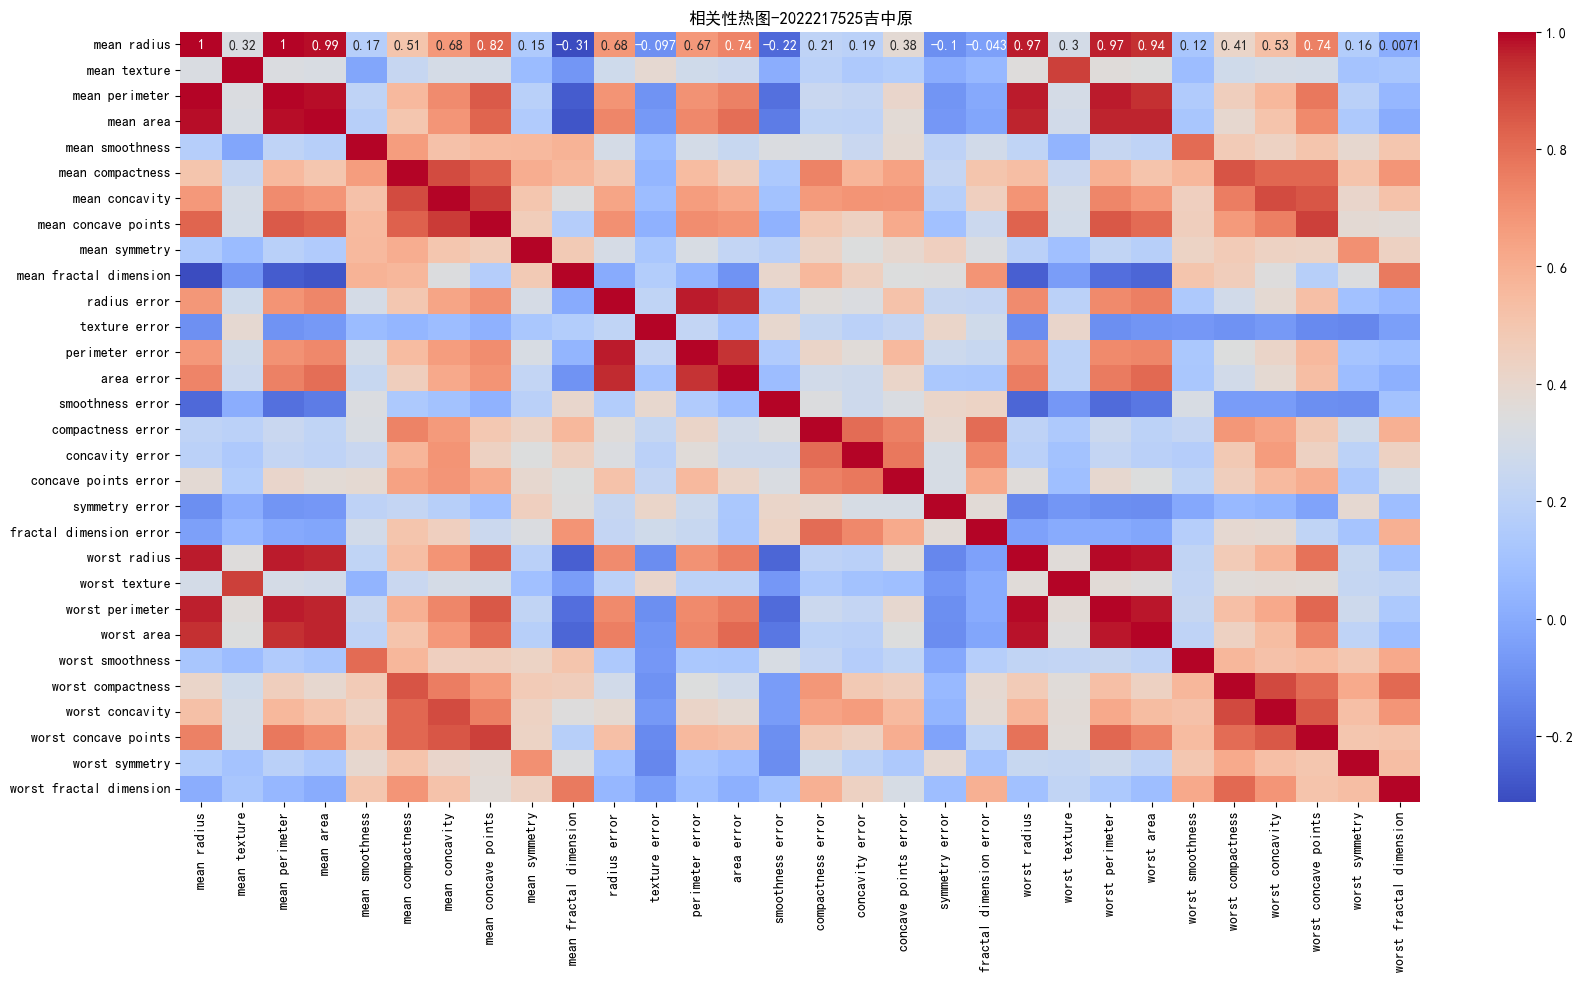

In [366]:
# 可视化相关系数热力图
plt.figure(figsize=(20, 10))
sns.heatmap(feature.corr(), annot=True, cmap="coolwarm")
plt.title("相关性热图-2022217525吉中原")
plt.show()

**热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合**

# 2.随机森林算法实现

## 对数据集机型划分

In [367]:
#划分数据集为训练集和测试集
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

#打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")

数据集拆分情况：
训练集：(398, 30)
测试集：(171, 30)


## 实现创建、训练模型等功能

In [368]:
#特征缩放
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) 
#训练模型
rf.fit(X_train, y_train)
#预测
y_pred = rf.predict(X_test)

#计算平均绝对误差和均方根误差
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.03508771929824561
Mean Squared Error: 0.03508771929824561


In [369]:
print("随机森林拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(rf.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(rf.score(X_test, y_test)))
print("==========")

随机森林拟合的结果：
训练集得分：0.9925
测试集得分：0.9649


 0.9925说明了模型几乎完美地学会了训练数据中的模式。
 0.9649说明了模型具有较好的泛化能力，不仅能在已知数据上表现良好，也将能较为准确地预测新数据

===========

## 实现各个特征对于模型预测的重要性排序的功能

In [370]:
#完成随机森林模型的训练后
rf = RandomForestClassifier()  #rf是训练好的实例
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

#获取特征名称
features = cancer.feature_names  
# 将特征重要性与特征名称配对
importance_series = pd.Series(feature_importances, index=features)

#打印
print(importance_series.sort_values(ascending=False))

mean concave points        0.136208
worst perimeter            0.113054
worst area                 0.112714
worst concave points       0.108997
worst radius               0.107087
mean concavity             0.060764
mean area                  0.053486
mean perimeter             0.048485
area error                 0.037841
worst concavity            0.027179
worst texture              0.019759
worst symmetry             0.016169
mean texture               0.016089
radius error               0.014938
worst compactness          0.014629
mean radius                0.014252
perimeter error            0.013187
worst smoothness           0.012434
mean compactness           0.009532
concavity error            0.007982
smoothness error           0.007237
worst fractal dimension    0.006893
texture error              0.006642
concave points error       0.006317
mean smoothness            0.005994
compactness error          0.005323
mean symmetry              0.005169
symmetry error             0

===========


## 模型的学习曲线

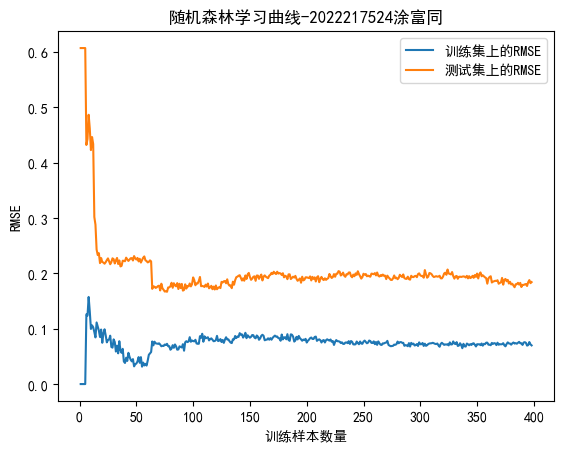

In [371]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    #初始化两个列表，分别用来存储训练集和测试集上的RMSE分数
    train_scores = []
    test_scores = []
    
    #遍历训练集
    for i in range(1, len(X_train)+1):
        #进行拟合
        algo.fit(X_train[:i], y_train[:i])
        
        #对训练集进行预测，并计算RMSE
        y_train_predict = algo.predict(X_train[:i])
        train_rmse = np.sqrt(mean_squared_error(y_train[:i], y_train_predict))
        #将训练集的RMSE添加到列表中
        train_scores.append(train_rmse)
        #对测试集进行预测，并计算RMSE
        y_test_predict = algo.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
        #将测试集的RMSE添加到列表中
        test_scores.append(test_rmse)

    #绘制学习曲线
    #x轴是训练样本的数量，y轴是RMSE
    plt.plot(range(1, len(X_train)+1), train_scores, label="训练集上的RMSE")  #训练集曲线
    plt.plot(range(1, len(X_train)+1), test_scores, label="测试集上的RMSE")   #测试集曲线
    
    #设置图表标题和坐标轴标签
    plt.title("随机森林学习曲线-2022217524涂富同")  #图表标题
    plt.xlabel("训练样本数量")  #x轴标签
    plt.ylabel("RMSE")  #y轴标签
    
    #添加图例来区分训练集和测试集的曲线
    plt.legend()
    
    #输出图标
    plt.show()

#传入模型及数据
plot_learning_curve(RandomForestRegressor(), X_train, X_test, y_train, y_test)#生成图表耗时较长

====================

## 模型的混淆矩阵

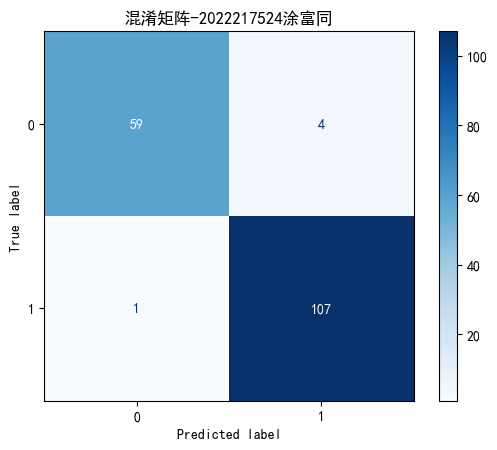

In [372]:
#定义函数
def plot_confusion_matrix(y_test, y_pred, title_suffix=""):
    #计算混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    #蓝色好看
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.rcParams['font.family'] = 'SimHei'
    plt.title(f"混淆矩阵-2022217524涂富同{title_suffix}")
    #输出图表
    plt.show()
y_pred, _ = train_and_evaluate_rf(X_train, y_train, X_test, y_test)
    
#绘制混淆矩阵
plot_confusion_matrix(y_test, y_pred)

## 模型的ROC曲线

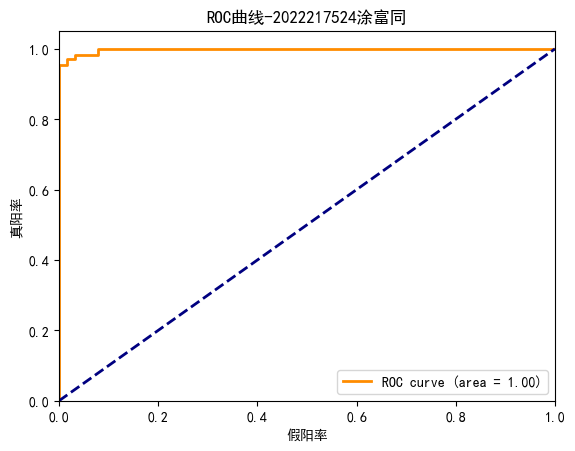

In [373]:
#计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_scores) #fpr为假阳率，tpr为真阳率
roc_auc = auc(fpr, tpr) #计算AUC
plt.figure()  #创建新的图表
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # 绘制ROC曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #绘制对角线
plt.xlim([0.0, 1.0])  #设置x轴的范围
plt.ylim([0.0, 1.05]) #设置y轴的范围，略大于1以完整显示曲线
plt.xlabel('假阳率')   #x轴标签
plt.ylabel('真阳率')   #y轴标签
plt.title('ROC曲线-2022217524涂富同')  
plt.legend(loc="lower right") 
#输出
plt.show()  